# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | weiser
Processing Record 7 of Set 1 | nguiu
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | denpasar
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | grand centre
City not found. Skipping...
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | mombetsu
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | auras
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | qarqin
Processing Record 22 of Set 1 | punta

Processing Record 37 of Set 4 | gharo
Processing Record 38 of Set 4 | howard springs
Processing Record 39 of Set 4 | alugan
Processing Record 40 of Set 4 | mehamn
Processing Record 41 of Set 4 | bati
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | shirgaon
Processing Record 45 of Set 4 | sisimiut
Processing Record 46 of Set 4 | maniitsoq
Processing Record 47 of Set 4 | tougue
Processing Record 48 of Set 4 | ust-kuyga
Processing Record 49 of Set 4 | yulara
Processing Record 0 of Set 5 | kaeo
Processing Record 1 of Set 5 | luwingu
Processing Record 2 of Set 5 | cape town
Processing Record 3 of Set 5 | tubuala
Processing Record 4 of Set 5 | anadyr
Processing Record 5 of Set 5 | ostersund
Processing Record 6 of Set 5 | hasaki
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | grand gaube
Processing Record 9 of Set 5 | lolua
City not found. Skipping...
Processing Record 10 of Set 5 | copiapo
Processing Re

Processing Record 30 of Set 8 | chivay
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | boyolangu
Processing Record 33 of Set 8 | tigil
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | petukhovo
Processing Record 36 of Set 8 | logan lake
Processing Record 37 of Set 8 | roald
Processing Record 38 of Set 8 | aquin
Processing Record 39 of Set 8 | trat
Processing Record 40 of Set 8 | pundaguitan
Processing Record 41 of Set 8 | teknaf
Processing Record 42 of Set 8 | havre-saint-pierre
Processing Record 43 of Set 8 | hovd
Processing Record 44 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 8 | geraldton
Processing Record 46 of Set 8 | sakakah
Processing Record 47 of Set 8 | saint george
Processing Record 48 of Set 8 | liverpool
Processing Record 49 of Set 8 | pinega
Processing Record 0 of Set 9 | tecoanapa
Processing Record 1 of Set 9 | itaueira
Processing Record 2 of Set 9 | phayakkhaphum phisai
Processing Recor

Processing Record 22 of Set 12 | erzin
Processing Record 23 of Set 12 | suratgarh
Processing Record 24 of Set 12 | brasilia de minas
Processing Record 25 of Set 12 | havelock
Processing Record 26 of Set 12 | bonavista
Processing Record 27 of Set 12 | port-gentil
Processing Record 28 of Set 12 | troitskiy
Processing Record 29 of Set 12 | kalamare
Processing Record 30 of Set 12 | kerman
Processing Record 31 of Set 12 | coquimbo
Processing Record 32 of Set 12 | agadez
Processing Record 33 of Set 12 | kegayli
City not found. Skipping...
Processing Record 34 of Set 12 | tifton
Processing Record 35 of Set 12 | borogontsy
Processing Record 36 of Set 12 | poshekhonye
Processing Record 37 of Set 12 | santa rosalia
Processing Record 38 of Set 12 | boqueirao
Processing Record 39 of Set 12 | panyutyne
Processing Record 40 of Set 12 | quibor
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,26.99,77,40,6.17,US,1651608887
1,barrow,71.2906,-156.7887,-5.99,86,100,5.14,US,1651608707
2,busselton,-33.6500,115.3333,13.33,68,84,4.85,AU,1651608889
3,mar del plata,-38.0023,-57.5575,16.08,59,0,6.17,AR,1651608890
4,vaini,-21.2000,-175.2000,23.09,88,20,2.57,TO,1651608890


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,18.569097,18.386519,17.035445,70.294011,55.324864,3.738966,1.651609e+09
std,33.000354,90.468810,11.122149,22.659711,40.152275,2.466185,1.052312e+02
min,-54.800000,-179.166700,-19.150000,1.000000,0.000000,0.000000,1.651609e+09
25%,-8.028350,-62.660450,10.485000,56.500000,13.000000,1.860000,1.651609e+09
50%,20.866700,22.636700,18.530000,77.000000,68.000000,3.100000,1.651609e+09
75%,44.742250,102.016100,25.980000,88.000000,99.000000,5.140000,1.651609e+09
max,78.218600,178.416700,38.610000,100.000000,100.000000,15.950000,1.651609e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,26.99,77,40,6.17,US,1651608887
1,barrow,71.2906,-156.7887,-5.99,86,100,5.14,US,1651608707
2,busselton,-33.6500,115.3333,13.33,68,84,4.85,AU,1651608889
3,mar del plata,-38.0023,-57.5575,16.08,59,0,6.17,AR,1651608890
4,vaini,-21.2000,-175.2000,23.09,88,20,2.57,TO,1651608890


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

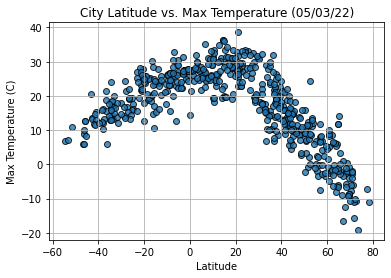

## Latitude vs. Humidity Plot

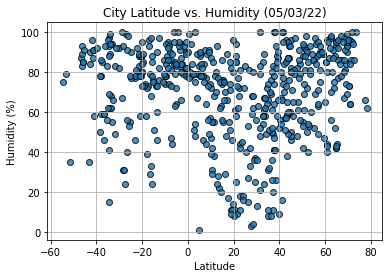

## Latitude vs. Cloudiness Plot

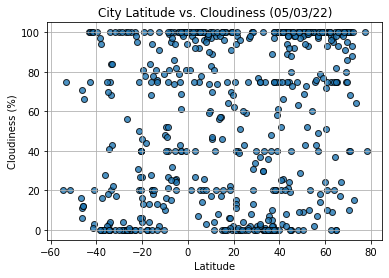

## Latitude vs. Wind Speed Plot

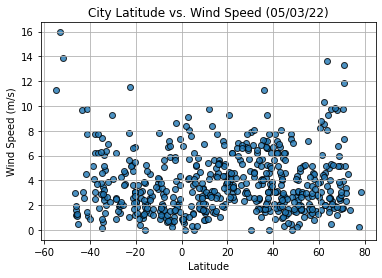

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7640805857357578


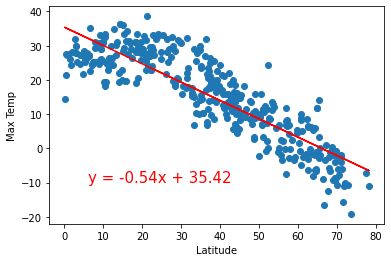

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6256245981061876


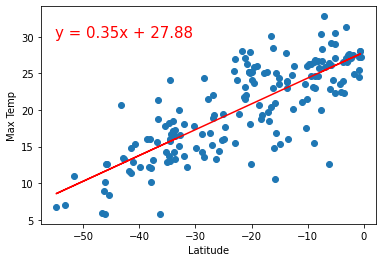

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06982695849910577


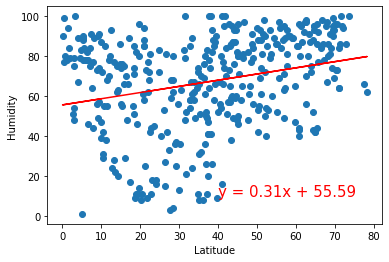

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02022495487637025


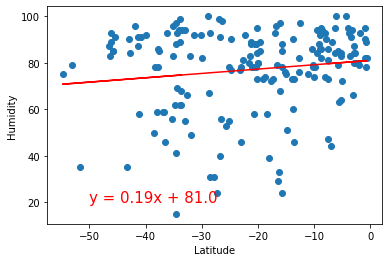

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.019699884022974727


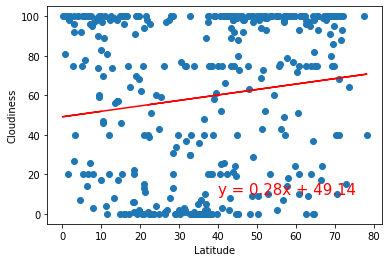

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.080260704316503


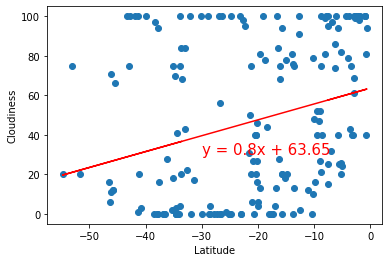

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0020341076093606733


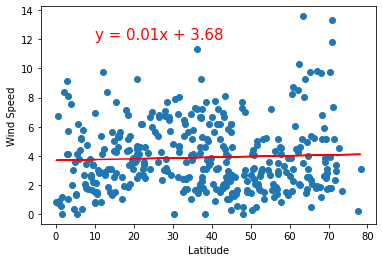

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07155750601569683


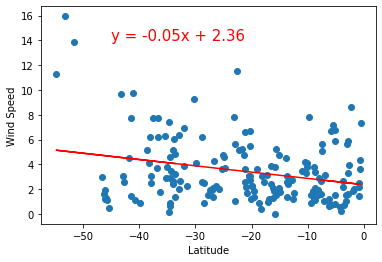